# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [6]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '230323'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic>=100)
endpoints = endpoint_defs$endpoint

In [7]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

In [8]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [9]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [10]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [11]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '230323'
name = glue("benchmarks_{today}")
benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoints_md) 

Joining with `by = join_by(endpoint)`


In [12]:
benchmark_endpoints %>% group_by(endpoint, score)  %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the
`.groups` argument.


score,mean(cindex)
<chr>,<dbl>
Retina,0.5588917
SCORE2,0.5917204
Age+Sex,0.5928119
ASCVD,0.5937363
Age+Sex+Retina,0.6003185
SCORE2+Retina,0.6007473
ASCVD+Retina,0.6022785


In [13]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the
`.groups` argument.


In [14]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

# CALCULATE THE FREQ of significant!

In [15]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

In [16]:
options(repr.matrix.max.rows=1500, repr.matrix.max.cols=200)

In [17]:
library(ggdist)

In [22]:
table_2_pre = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    median_qi(delta) %>% filter(endpoint %in% endpoints_md$endpoint)
    #mutate(posdelta = case_when(delta>=0 ~ "pos", delta < 0 ~"neg"))
#table_2_pre %>% head()
print(nrow(table_2_pre))

cat("nrows with positive lower q of delta:", nrow(table_2_pre %>% filter(.lower > 0)))
cat("\nnrows with negative lower q of delta:", nrow(table_2_pre %>% filter(.lower <= 0)))
cat("\nnrows with positive delta:", nrow(table_2_pre %>% filter(delta > 0)))
cat("\nnrows with negative delta:", nrow(table_2_pre %>% filter(delta <= 0)))

[1] 172
nrows with positive lower q of delta: 55
nrows with negative lower q of delta: 117
nrows with positive delta: 109
nrows with negative delta: 63

In [23]:
table_2_significant = table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint)

table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint) %>% 
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/SupplTable2_SignificantEndpoints_CropRatio-{crop_ratio}.csv"))

table_2_pre %>%
    arrange(endpoint) %>% 
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/SupplTable2_DeltasAllEndpoints_CropRatio-{crop_ratio}.csv"))

glue("outputs/SupplTable2_SignificantEndpoints_CropRatio-{crop_ratio}.csv")

In [24]:
og_counts = table_2_pre %>% group_by(phecode_category) %>% count() %>% select(phecode_category, n) %>% rename(N_total = n)
tmp = table_2_significant %>% group_by(phecode_category) %>% count() %>% left_join(og_counts) %>% mutate(Percent_Significant=n/ N_total) 
#%>%        unite(s, n, N_total, sep = "/", remove=FALSE)
tmp %>%  
mutate_if(is.numeric, round, 3) %>%
write_csv(glue("outputs/SupplTable2_RatioOfSignificantEndpoints-{crop_ratio}.csv"))

Joining with `by = join_by(phecode_category)`
`mutate_if()` ignored the following grouping variables:
• Column `phecode_category`


ERROR: Error in eval(parse(text = text, keep.source = FALSE), envir): object 'crop_ratio' not found


## delta c-idx with negative values

`summarise()` has grouped output by 'endpoint', 'phecode_string'. You can
override using the `.groups` argument.


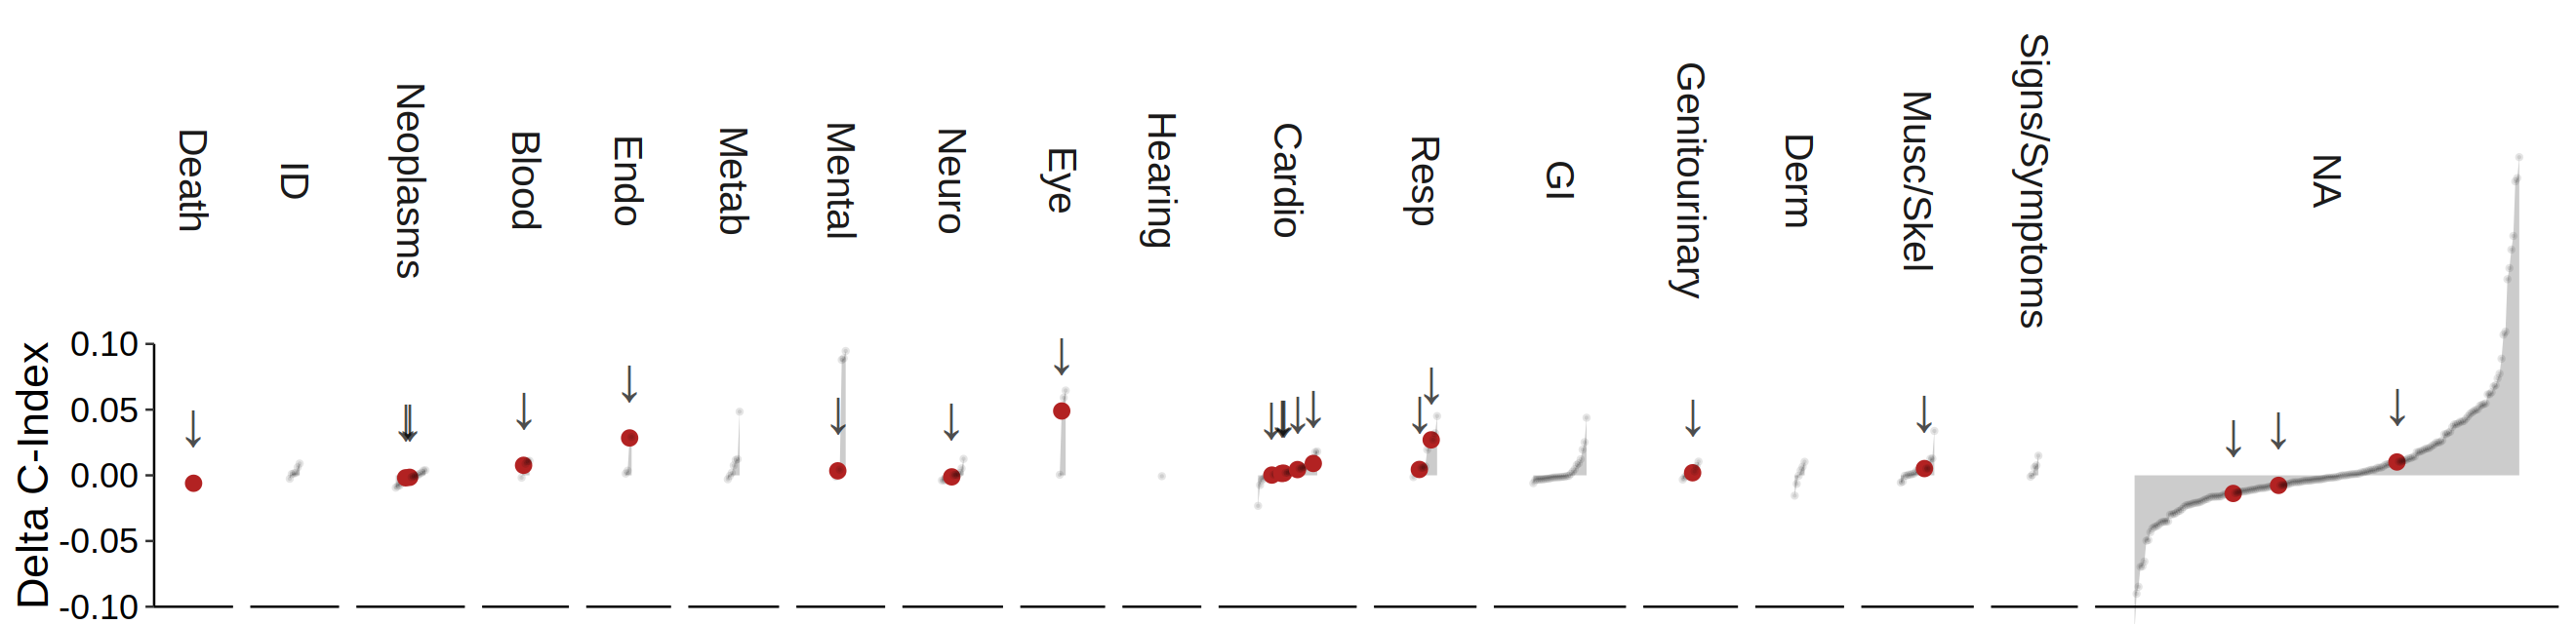

In [42]:
geom.text.size = 1

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    summarise(delta = median(delta)) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp %>% arrange(delta))$endpoint

temp = temp %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

ggplot(temp) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.045, label="↓"), color="black", size=5, alpha=0.7) +
#     geom_text(data=tmp,
#               mapping = aes(x = -Inf, y = -Inf, label =s),
#               hjust   = -0.1, 
#               vjust   = -13) + 
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y=glue("Delta C-Index"))+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(-0.1, 0.1), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)

## delta c-idx with positive values (negative set to 0)

`summarise()` has grouped output by 'endpoint', 'phecode_string'. You can
override using the `.groups` argument.


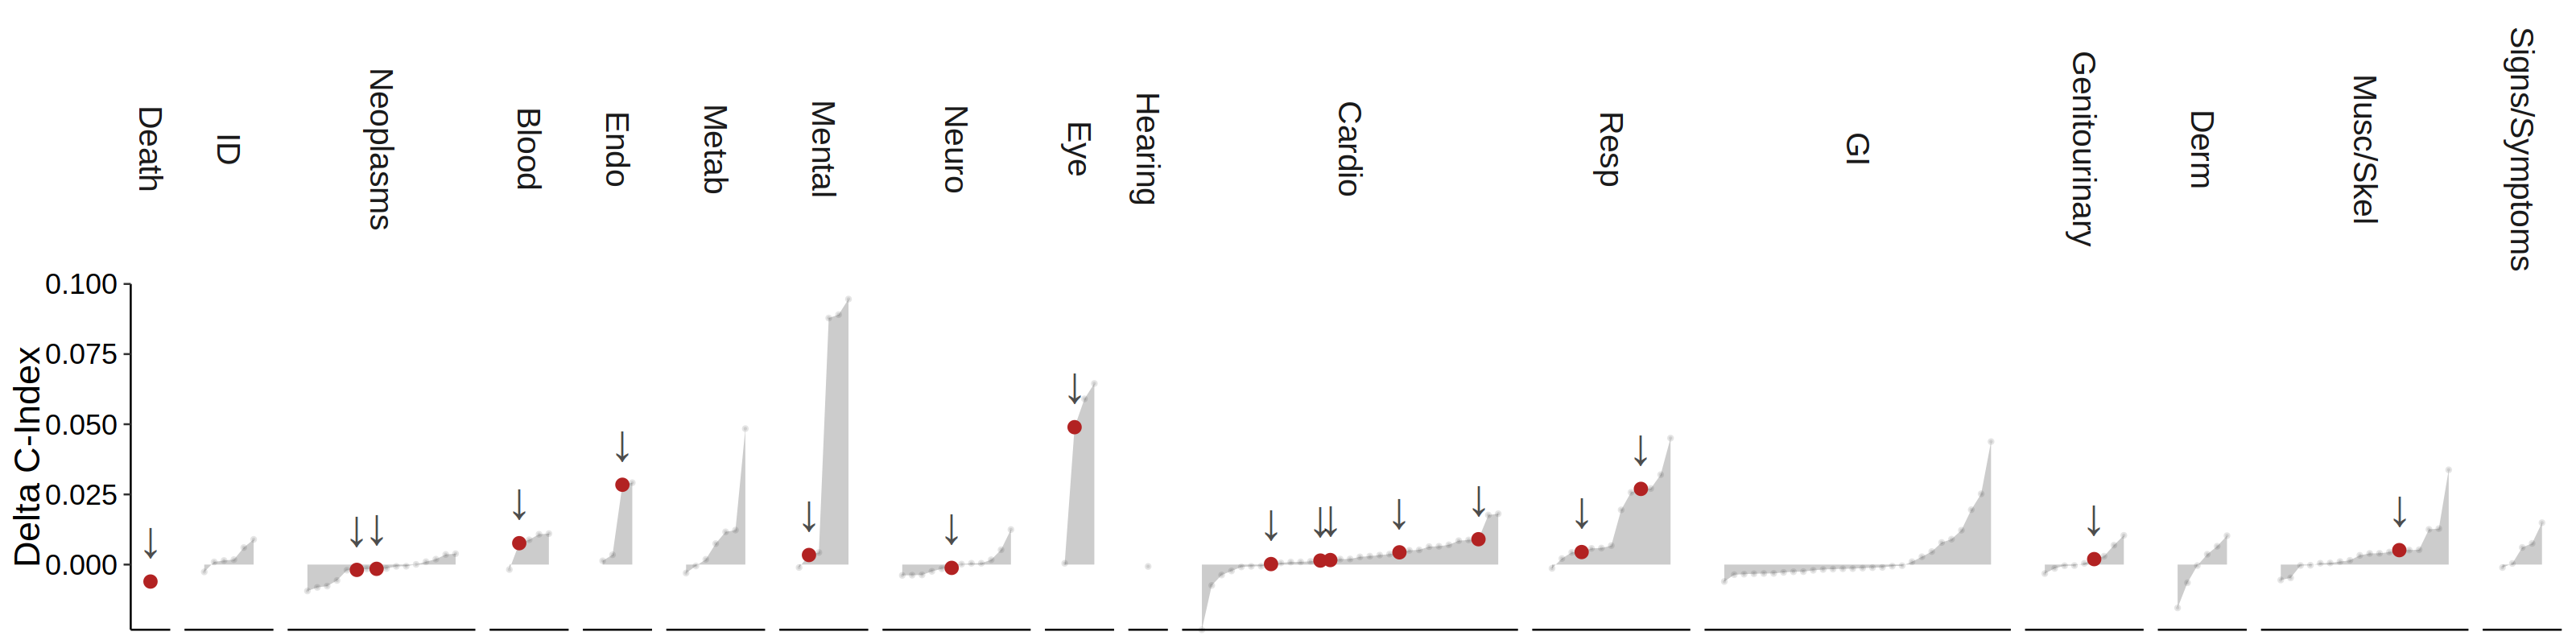

In [43]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp_pos = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>% filter(endpoint %in% endpoints_md$endpoint)

temp_pos = temp_pos %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    summarise(delta = median(delta)) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp_pos %>% arrange(delta))$endpoint

temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

fig3a = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.015, label="↓"), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y=glue("Delta C-Index"))+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, 0.1), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=2))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
fig3a    
#geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)

In [41]:
plot_name = "SupplFigure3a_EPIC_Discrimination_PhenomeWide"
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/SupplFigure3a.csv"))

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

In [ ]:
ukb = fread("SupplTables - ST4_ DiscriminativePerformaceAllEndpoints.csv")
ukb

In [51]:
epic_agg <- benchmark_endpoints %>%
  filter(score %in% scores_plot) %>%
  mutate(score = factor(score, levels = scores_plot)) %>%
  mutate(endpoint = factor(endpoint, levels = endpoints_sorted)) %>%
  ungroup() %>%
  pivot_wider(names_from = score, values_from = cindex) %>% 
  mutate(id = row_number()) %>%
  mutate(delta = `Age+Sex+Retina` - `Age+Sex`) %>%
  filter(endpoint %in% endpoints_md$endpoint) %>%
  group_by(endpoint, phecode_string, phecode_category) %>%
  median_qi(`Age+Sex`, `Age+Sex+Retina`, delta) %>%
  mutate(endpoint = fct_reorder(endpoint, delta)) %>%
  mutate(phecode_category = factor(phecode_category, levels = categories_sorted))

In [59]:
epic <- epic_agg %>%
  mutate(epic_agesex = glue("{round(`Age+Sex`, 3)} ({round(`Age+Sex.lower`, 3)}, {round(`Age+Sex.upper`, 3)})"),
         epic_agesexretina = glue("{round(`Age+Sex+Retina`, 3)} ({round(`Age+Sex+Retina.lower`, 3)}, {round(`Age+Sex+Retina.upper`, 3)})"),
         epic_delta = glue("{round(delta, 3)} ({round(`delta.lower`, 3)}, {round(`delta.upper`, 3)})")
        ) %>%
  select(epic_agesex, epic_agesexretina, epic_delta)

Adding missing grouping variables: `endpoint`, `phecode_string`


In [73]:
st4 = ukb %>% left_join(epic, by=c("endpoint", "phecode_string")) %>% as_tibble()

In [75]:
st4_clean <- st4 %>%
  mutate(across(everything(), ~ replace_na(., ""), .names = "{col}"))

In [78]:
st4_clean

phecode_category,endpoint,phecode_string,ukb_agesex,ukb_agesexretina,ukb_delta,epic_agesex,epic_agesexretina,epic_delta
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<glue>,<glue>
Blood,phecode_165,Hemoglobinopathies,"0.612 (0.575, 0.655)","0.872 (0.85, 0.905)","0.259 (0.214, 0.312)",,,
Eye,phecode_387-2,Myopia,"0.585 (0.565, 0.603)","0.818 (0.803, 0.833)","0.232 (0.213, 0.26)",,,
Derm,phecode_688-1,Sarcoidosis,"0.29 (0.255, 0.319)","0.5 (0.457, 0.543)","0.207 (0.161, 0.263)",,,
Derm,phecode_665-3,Other psoriasis,"0.373 (0.328, 0.41)","0.547 (0.506, 0.579)","0.175 (0.12, 0.23)",,,
Eye,phecode_373,Noninflammatory disorders of choroid,"0.582 (0.547, 0.613)","0.753 (0.712, 0.783)","0.173 (0.139, 0.203)",,,
Derm,phecode_665-2,Psoriatic arthropathy,"0.37 (0.324, 0.405)","0.537 (0.5, 0.572)","0.169 (0.122, 0.214)",,,
ID,phecode_005,Mycobacteria,"0.485 (0.447, 0.532)","0.651 (0.602, 0.695)","0.169 (0.117, 0.225)",,,
Neoplasms,phecode_139-3,Benign neoplasm of other connective and soft tissue,"0.4 (0.352, 0.446)","0.551 (0.502, 0.592)","0.149 (0.096, 0.188)",,,
Eye,phecode_377-5,Vitreous hemorrhage,"0.546 (0.507, 0.577)","0.684 (0.645, 0.732)","0.143 (0.094, 0.184)",,,


In [77]:
st4_clean %>% write_csv("outputs/SupplTable4_ukbepic_merged.csv")

In [35]:
plot_width = 8.25; plot_height=2; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Retina", "Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    #mutate(delta_int = `Age+Sex+Retina`-`Age+Sex+Retina`) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    filter(endpoint %in% endpoint_selection)
    #%>%
    #summarise(cindex = mean(cindex)) 
temp %>% head()

endpoint,model,iteration,time,n_epic,eligable,n,freq,phecode,phecode_string,phecode_category,sex,Age+Sex,Retina,Age+Sex+Retina,id,delta,pos,highlight
<fct>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
OMOP_4306655,RetinaUKB,0,10,111,61256,3548,0.05792086,4306655,All-Cause Death,Death,Both,0.7489679,0.6828011,0.7455266,1,-0.0034413682,neg,YES
phecode_101,RetinaUKB,0,10,243,60713,1652,0.02720999,101,Malignant neoplasm of the digestive organs,Neoplasms,Both,0.6286183,0.5829767,0.6268683,15,-0.0017499574,neg,YES
phecode_102,RetinaUKB,0,10,NA,NA,NA,NA,NA,NA,NA,NA,0.6354517,0.6245727,0.6481125,22,0.0126607788,pos,YES
phecode_103,RetinaUKB,0,10,651,59332,3620,0.06101261,103,Malignant neoplasm of the skin,Neoplasms,Both,0.6237659,0.5820031,0.6228162,24,-0.0009496536,neg,YES
phecode_164,RetinaUKB,0,10,648,57646,4945,0.08578219,164,Anemia,Blood,Both,0.6389622,0.6175132,0.6458954,64,0.0069331670,pos,YES
phecode_202,RetinaUKB,0,10,620,57936,4259,0.07351215,202,Diabetes mellitus,Endo,Both,0.6074612,0.6305492,0.6360661,76,0.0286048722,pos,YES


In [36]:
library(ggdist)

In [37]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [25]:
endpoint_selection 

[1] "phecode_202"    "phecode_401"    "phecode_404"    "phecode_404-1" 
 [5] "phecode_431-11" "phecode_424"    "phecode_059-1"  "phecode_468"   
 [9] "phecode_474"    "phecode_286-2"  "phecode_324-11" "phecode_328"   
[13] "phecode_164"    "phecode_726-1"  "phecode_371"    "phecode_374-42"
[17] "phecode_374-5"  "phecode_375-1"  "phecode_103"    "phecode_101"   
[21] "phecode_102"    "phecode_583"    "phecode_542"    "OMOP_4306655"